## Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

Прочтем и выведем на экран данные геологоразведки трех регионов из каждого файла

In [2]:
data_1 = pd.read_csv('/datasets/geo_data_0.csv')
data_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
data_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [4]:
data_3 = pd.read_csv('/datasets/geo_data_2.csv')
data_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


### Предобработка данных

Проверим каждую таблицу на наличие пропусков, дубликатов и соответсвие типов данных требуемым типам

**Первая таблица**

In [5]:
data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [6]:
data_1.duplicated().sum()

0

In [7]:
data_1.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

**Вторая таблица**

In [8]:
data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [9]:
data_2.duplicated().sum()

0

In [10]:
data_2.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

**Третья таблица**

In [11]:
data_3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [12]:
data_3.duplicated().sum()

0

In [13]:
data_3.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

**Выводы:** Данные "чистые", предобработка не требуется

### Определение признаков и целевого признака

Целевой признак - product (объём запасов в скважине), признаки - f0, f1, f2

In [14]:
features_1 = data_1.drop(['product', 'id'], axis=1)
target_1 = data_1['product']
features_2 = data_2.drop(['product', 'id'], axis=1)
target_2 = data_2['product']
features_3 = data_3.drop(['product', 'id'], axis=1)
target_3 = data_3['product']

## Обучение и проверка модели

### Первый регион

Разделим данные по первому региону на тестовую и валидационную выборку в соотношении 75:25

In [15]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
                                features_1, target_1, test_size=0.25, random_state=42)

Обучим модель (линейная регрессия) и сделаем предсказания на валидационной выборке

In [16]:
model = LinearRegression()
model.fit(features_train_1, target_train_1)
predict_1 = model.predict(features_valid_1)

Средний запас предсказанного сырья

In [17]:
predict_1.mean()

92.39879990657768

RMSE модели 

In [18]:
mean_squared_error(target_valid_1, predict_1)**0.5

37.75660035026169

### Второй регион

Разделим данные по второму региону на тестовую и валидационную выборку в соотношении 75:25

In [19]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
                                features_2, target_2, test_size=0.25, random_state=42)

Обучим модель (линейная регрессия) и сделаем предсказания на валидационной выборке

In [20]:
model.fit(features_train_2, target_train_2)
predict_2 = model.predict(features_valid_2)

Средний запас предсказанного сырья

In [21]:
predict_2.mean()

68.71287803913764

RMSE модели

In [22]:
mean_squared_error(target_valid_2, predict_2)**0.5

0.8902801001028828

### Третий регион

Разделим данные по третьему региону на тестовую и валидационную выборку в соотношении 75:25

In [23]:
features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(
                                features_3, target_3, test_size=0.25, random_state=42)

Обучим модель (линейная регрессия) и сделаем предсказания на валидационной выборке

In [24]:
model.fit(features_train_3, target_train_3)
predict_3 = model.predict(features_valid_3)

Средний запас предсказанного сырья

In [25]:
predict_3.mean()

94.77102387765939

RMSE модели

In [26]:
mean_squared_error(target_valid_3, predict_3)**0.5

40.145872311342174

### Выводы

Наибольший средний запас предсказанного сырья принадлежит третьему региону, но при этом RMSE у модели третьего региона наибольшая. Наименьший запас предсказанного сырья принадлежит второму региону, но при этом RMSE у модели второго региона принимает наименьшее значение и ничтожно мало по сравнению с RMSE других двух регионов.

## Подготовка к расчету прибыли

Сохраним все ключевые значения для расчётов в отдельных переменных

In [27]:
POINTS = 500
TOTAL_BUDGET = 10e9
ONE_POINT_COST = 50e6 # total_budget / 200
BARREL_PROFIT = 450
BOOTSTRAP_SAMPLES = 1000

Рассчитаем минимальный объём сырья для безубыточной разработки новой скважины

In [28]:
min_barrels = ONE_POINT_COST / (BARREL_PROFIT * 1000)
min_barrels

111.11111111111111

Данный объем больше средних запасов сырья в каждом регионе (92.4, 68.7, 94.7)

## Расчёт прибыли и рисков 

Функция для расчета прибыли

In [45]:
def profit(target, prediction, count):
    top = prediction.sort_values(ascending=False).head(count)
    total_profit = (target.loc[top.index] * BARREL_PROFIT * 1000).sum()
    return total_profit - (ONE_POINT_COST * count)

Далее необходимо посчитать прибыль и риски для каждого региона

### Первый регион

In [46]:
values_1 = list()
predict_1 = pd.Series(predict_1)
predict_1.index = target_valid_1.index
state = np.random.RandomState(42)
for i in range(BOOTSTRAP_SAMPLES):
    target_subsample = target_valid_1.sample(POINTS, random_state=state)
    prediction_subsample = predict_1.loc[target_subsample.index]
    values_1.append(profit(target_subsample, prediction_subsample, 200))
values_1 = pd.Series(values_1)

Средняя прибыль

In [47]:
values_1.mean()

408515053.8838972

Риск убытков

In [48]:
values_1[values_1<0].count() / values_1.count()

0.074

95% доверительный интервал

In [49]:
lower_1 = values_1.quantile(0.025)
upper_1 = values_1.quantile(0.975)
print(f'Доверительный интервал: {lower_1}, {upper_1}')

Доверительный интервал: -138678493.88196227, 952414908.4140624


### Второй регион

In [34]:
values_2 = list()
predict_2 = pd.Series(predict_2)
predict_2.index = target_valid_2.index
state = np.random.RandomState(42)
for i in range(BOOTSTRAP_SAMPLES):
    target_subsample = target_valid_2.sample(POINTS, random_state=state)
    prediction_subsample = predict_2.loc[target_subsample.index]
    values_2.append(profit(target_subsample, prediction_subsample, 200))
values_2 = pd.Series(values_2)

Средняя прибыль

In [35]:
values_2.mean()

441672839.14009184

Риск убытков

In [36]:
values_2[values_2<0].count() / values_2.count()

0.022

95% доверительный интервал

In [37]:
lower_2 = values_2.quantile(0.025)
upper_2 = values_2.quantile(0.975)
print(f'Доверительный интервал: {lower_2}, {upper_2}')

Доверительный интервал: 15291179.10368758, 831000005.9747208


### Третий регион

In [38]:
values_3 = list()
predict_3 = pd.Series(predict_3)
predict_3.index = target_valid_3.index
state = np.random.RandomState(42)
for i in range(BOOTSTRAP_SAMPLES):
    target_subsample = target_valid_3.sample(POINTS, random_state=state)
    prediction_subsample = predict_3.loc[target_subsample.index]
    values_3.append(profit(target_subsample, prediction_subsample, 200))
values_3 = pd.Series(values_3)

Средняя прибыль

In [39]:
values_3.mean()

378388183.0015765

Риск убытков

In [40]:
values_3[values_3<0].count() / values_3.count()

0.078

95% доверительный интервал

In [41]:
lower_3 = values_3.quantile(0.025)
upper_3 = values_3.quantile(0.975)
print(f'Доверительный интервал: {lower_3}, {upper_3}')

Доверительный интервал: -152715001.72096324, 874058317.5983077


### Выводы

Построим гистограммы для каждого региона для бОльшей наглядности

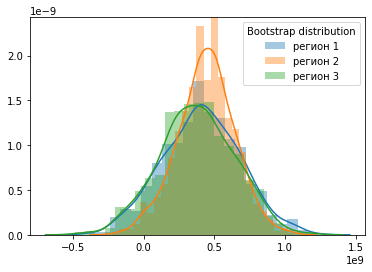

In [42]:
values = [values_1, values_2, values_3]
for i in range(1, len(values)+1):
    sns.distplot(values[i-1], label=f'регион {i}')
    plt.legend(title='Bootstrap distribution')

Исходя из полученных данных, я бы выбрал 2 регион, так как в нем самая высокая средняя прибыть, самый узкий 95% доверительный интервал и наименьший риск убытков. Также, это единственный регион, в котором риск убытков не превышает порог в 2.5%